In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df=pd.read_csv('telecom_churn.csv')

In [3]:
df.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Random Numbers from Uniform Distribution,Train_Test_Split
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,0.31,Training
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.84,Testing
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.24,Training
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,0.10,Training
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,0.21,Training


In [4]:
df.dtypes

state                                          object
account length                                  int64
area code                                       int64
international plan                             object
voice mail plan                                object
number vmail messages                           int64
total day minutes                             float64
total day calls                                 int64
total day charge                              float64
total eve minutes                             float64
total eve calls                                 int64
total eve charge                              float64
total night minutes                           float64
total night calls                               int64
total night charge                            float64
total intl minutes                            float64
total intl calls                                int64
total intl charge                             float64
customer service calls      

In [5]:
df.shape

(3333, 22)

In [6]:
#To check for Null values:
df.isnull().sum()

state                                         0
account length                                0
area code                                     0
international plan                            0
voice mail plan                               0
number vmail messages                         0
total day minutes                             0
total day calls                               0
total day charge                              0
total eve minutes                             0
total eve calls                               0
total eve charge                              0
total night minutes                           0
total night calls                             0
total night charge                            0
total intl minutes                            0
total intl calls                              0
total intl charge                             0
customer service calls                        0
churn                                         0
 Random Numbers from Uniform Distributio

In [14]:
df=df.drop(['area code'],axis=1)

In [19]:
df=df.drop(['Train_Test_Split'],axis=1)

In [20]:
char=df.select_dtypes(include='object')
char.dtypes

state                 object
international plan    object
voice mail plan       object
dtype: object

In [24]:
num=df.select_dtypes(include='number')
num.dtypes


account length                                  int64
number vmail messages                           int64
total day minutes                             float64
total day calls                                 int64
total day charge                              float64
total eve minutes                             float64
total eve calls                                 int64
total eve charge                              float64
total night minutes                           float64
total night calls                               int64
total night charge                            float64
total intl minutes                            float64
total intl calls                                int64
total intl charge                             float64
customer service calls                          int64
churn                                           int64
 Random Numbers from Uniform Distribution     float64
dtype: object

In [25]:
#Encoding categorical features:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
num=pd.DataFrame(stdsc.fit_transform(num),index=num.index,columns=num.columns)

In [26]:
X_char=pd.get_dummies(char)

In [27]:
X_all=pd.concat([num,X_char],axis=1,join="inner")

In [28]:
X=X_all.drop(['churn'],axis=1)

In [29]:
X.head(5)

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.676489,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,...,0,0,0,0,0,0,1,0,0,1
1,0.149065,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,...,0,0,0,0,0,0,1,0,0,1
2,0.902529,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,...,0,0,0,0,0,0,1,0,1,0
3,-0.428590,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,...,0,0,0,0,0,0,0,1,1,0
4,-0.654629,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,...,0,0,0,0,0,0,0,1,1,0


In [30]:
X.dtypes

account length            float64
number vmail messages     float64
total day minutes         float64
total day calls           float64
total day charge          float64
                           ...   
state_WY                    uint8
international plan_no       uint8
international plan_yes      uint8
voice mail plan_no          uint8
voice mail plan_yes         uint8
Length: 71, dtype: object

In [31]:
from sklearn.feature_selection import VarianceThreshold
varcutoff=VarianceThreshold()
X=pd.DataFrame(varcutoff.fit_transform(X),index=X.index,columns=X.columns)
X.describe(percentiles=[0.01,0.02,0.05,0.1,0.15,0.25,0.50,0.75,0.90,0.95,0.97,0.98,0.99])

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1.713134e-16,3.832651e-16,7.081711e-16,-2.150828e-16,-3.226409e-16,-1.067919e-16,3.527531e-16,1.266447e-16,6.602046e-17,-7.041739e-17,...,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.903090,0.096910,0.723372,0.276628
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,...,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.295879,0.295879,0.447398,0.447398
min,-2.513172e+00,-5.917599e-01,-3.301096e+00,-5.005247e+00,-3.301162e+00,-3.963622e+00,-5.025911e+00,-3.963679e+00,-3.513648e+00,-3.429870e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,-2.228866e+00,-5.917599e-01,-2.349338e+00,-2.314137e+00,-2.349212e+00,-2.395294e+00,-2.365219e+00,-2.395427e+00,-2.401681e+00,-2.203232e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2%,-2.035979e+00,-5.917599e-01,-2.142578e+00,-2.064960e+00,-2.143034e+00,-2.106888e+00,-2.064009e+00,-2.107911e+00,-2.038672e+00,-1.998792e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,-1.659247e+00,-5.917599e-01,-1.649952e+00,-1.666277e+00,-1.649841e+00,-1.620715e+00,-1.662395e+00,-1.620303e+00,-1.635320e+00,-1.641023e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,-1.282516e+00,-5.917599e-01,-1.275360e+00,-1.307463e+00,-1.275464e+00,-1.267307e+00,-1.260782e+00,-1.267173e+00,-1.276188e+00,-1.283253e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
15%,-1.031361e+00,-5.917599e-01,-1.018654e+00,-1.018418e+00,-1.018823e+00,-1.015267e+00,-1.009773e+00,-1.014738e+00,-1.031756e+00,-1.078813e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,-6.797448e-01,-5.917599e-01,-6.624241e-01,-6.695701e-01,-6.623760e-01,-6.780300e-01,-6.583610e-01,-6.783123e-01,-6.698545e-01,-6.699340e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [32]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_std=pd.DataFrame(stdsc.fit_transform(X), index=X.index, columns=X.columns)

In [35]:
X_std.head(5)
Y=df['churn']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,Y, test_size=0.3,random_state=42)

In [38]:
y_train.mean()

0.14573510501500214

In [39]:
y_test.mean()

0.143

In [51]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors = 5, weights='uniform',metric = 'minkowski', p = 2)
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred=clf.predict(X_test)

In [53]:
from sklearn import metrics

In [54]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.89
Precision 0.9024390243902439
Recall 0.25874125874125875
f1_score 0.4021739130434783


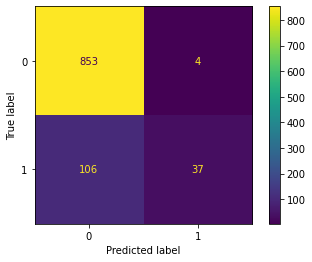

In [55]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

In [56]:
metrics.roc_auc_score(y_test,y_pred)

0.6270369070835815

In [58]:
y_pred_prob = clf.predict_proba(X)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_RF']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank_RF')['churn'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,334,0.679641,227.0,227.0,0.469979,0.469979,0.10021,0.10021,1,4.689943
1,9,333,0.270270,90.0,317.0,0.186335,0.656315,0.09991,0.20012,2,3.279606
2,8,333,0.174174,58.0,375.0,0.120083,0.776398,0.09991,0.30003,3,2.587733
3,7,333,0.177177,59.0,434.0,0.122153,0.898551,0.09991,0.39994,4,2.246714
4,6,333,0.048048,16.0,450.0,0.033126,0.931677,0.09991,0.49985,5,1.863913
5,5,334,0.023952,8.0,458.0,0.016563,0.948240,0.10021,0.60006,6,1.580242
6,4,333,0.030030,10.0,468.0,0.020704,0.968944,0.09991,0.69997,7,1.384265
7,3,333,0.006006,2.0,470.0,0.004141,0.973085,0.09991,0.79988,8,1.216539
8,2,333,0.018018,6.0,476.0,0.012422,0.985507,0.09991,0.89979,9,1.095264
9,1,334,0.020958,7.0,483.0,0.014493,1.000000,0.10021,1.00000,10,1.000000
